## 保险赔偿数据预测

回归问题


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

### 1.读取数据

In [2]:
data=pd.read_csv('./train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194592 entries, 0 to 194591
Columns: 133 entries, id to Unnamed: 132
dtypes: float64(15), int64(1), object(117)
memory usage: 197.5+ MB


In [3]:
data.head(5)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,Unnamed: 132
0,1,A,B,A,B,A,A,A,A,B,...,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,NaN
1,2,A,B,A,A,A,A,A,A,B,...,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,NaN
2,5,A,B,A,A,B,A,A,A,B,...,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,NaN
3,10,B,B,A,B,A,A,A,A,B,...,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,NaN
4,11,A,B,A,B,A,A,A,A,B,...,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,NaN


In [4]:
data.drop(['id'],axis=1,inplace=True)
# 多出一个unnamed，很奇怪
data=data.iloc[:,:-1]

In [5]:
cat_list=[col for col in data.select_dtypes(include=['object'])]
len(cat_list)

116

In [6]:
# 目标数值loss也属于数值型
numic_list=[col for col in data.select_dtypes(exclude=['object'])]
len(numic_list)

15

### 2.数据预处理

In [7]:
data=pd.DataFrame(data)
pd.isnull(data).values.any()
# 返回False表明数据无缺失

False

In [8]:
# 统计各个类别型特征的类别数目
cat_num=[]
for cat in cat_list:
    cat_num.append(len(data[cat].unique()))

cat_df=pd.DataFrame.from_items([('cat_name',cat_list),('cat_num',cat_num)])
cat_df.head()

,cat_name,cat_num
0,cat1,2
1,cat2,2
2,cat3,2
3,cat4,2
4,cat5,2


(array([111.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  2. ,  34.8,  67.6, 100.4, 133.2, 166. , 198.8, 231.6, 264.4,
        297.2, 330. ]),
 <a list of 10 Patch objects>)

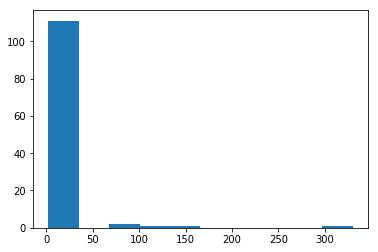

In [9]:
plt.hist(cat_df['cat_num'])
# 大部分都是2个

In [10]:
# 数值编码
for cat in cat_list:
    data[cat]=pd.Categorical(data[cat]).codes
data.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,0,1,0,1,0,0,0,0,1,0,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,0,1,0,0,0,0,0,0,1,1,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,0,1,0,0,1,0,0,0,1,1,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,1,1,0,1,0,0,0,0,1,0,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,0,1,0,1,0,0,0,0,1,1,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194592 entries, 0 to 194591
Columns: 131 entries, cat1 to loss
dtypes: float64(15), int16(2), int8(114)
memory usage: 44.2 MB


In [12]:
# 查看数值特征统计信息
data[numic_list].describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000
mean,0.493792,0.507093,0.498875,0.491791,0.487384,0.490856,0.484889,0.486468,0.485425,0.498049,0.493431,0.493072,0.493112,0.495594,3036.251056
std,0.187636,0.207144,0.202033,0.211273,0.208998,0.205329,0.178466,0.199410,0.181634,0.185915,0.209739,0.209442,0.212785,0.222486,2900.977675
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.335580,0.350175,0.312800,0.358970,0.364580,0.310961,0.308395,0.315758,0.294610,1204.262500
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.437310,0.461190,0.457203,0.462286,0.363547,0.407325,2114.585000
75%,0.623912,0.681761,0.634224,0.652072,0.635304,0.654290,0.590807,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724610,3862.492500
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


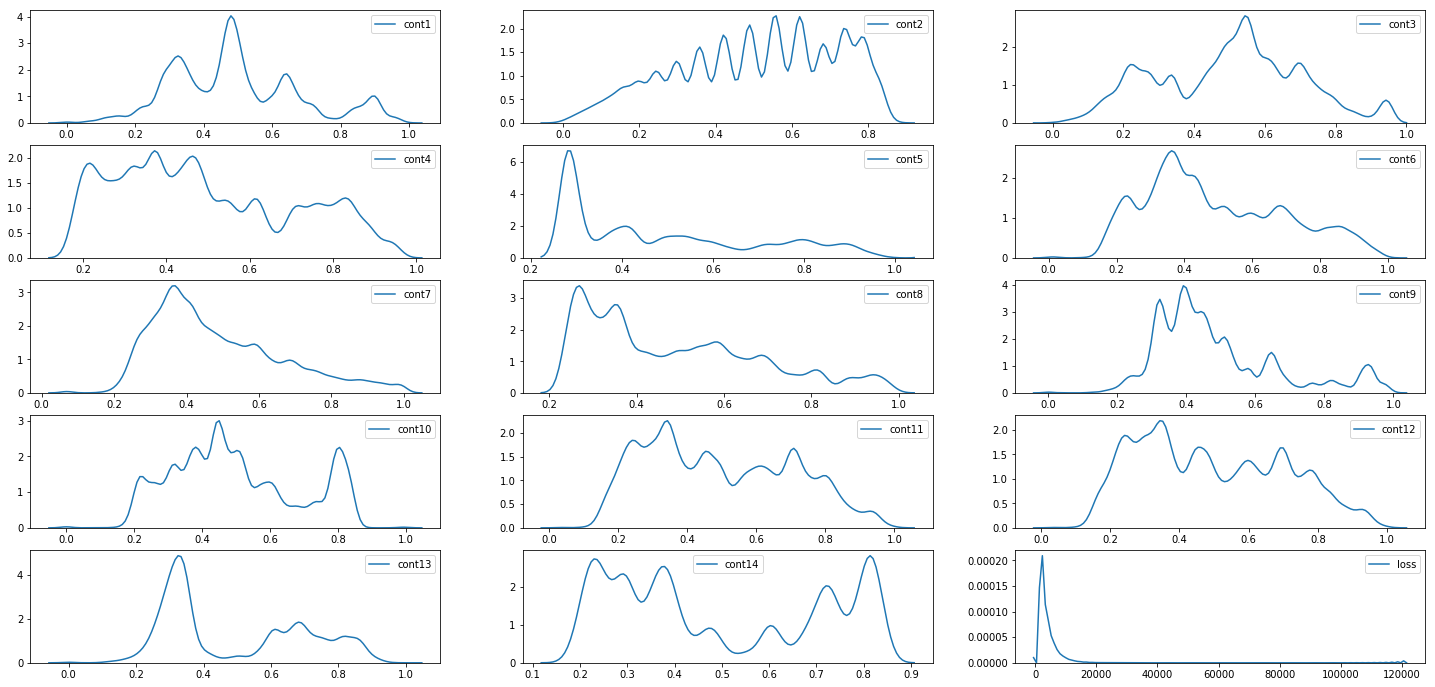

In [13]:
fig,axes=plt.subplots(5,3,figsize=(25,12))
axes=axes.flatten()
for i,numic in enumerate(numic_list):
    sns.kdeplot(data=data[numic],ax=axes[i])
plt.show()
# loss呈明显重尾分布，其他数据均值皆为0.5附近，且中位数与均值相近，故可近似为正态分布

In [14]:
from scipy.stats import skew
skew(data['loss'])
# 偏差有些大

3.761640141388762

In [15]:
# log变换（最小值大于0，直接log变换就可以）
data['log_loss']=np.log(data['loss'])
skew(data['log_loss'])
# 偏差与0很接近，故loss变换后近似正态分布

0.09292329281420975

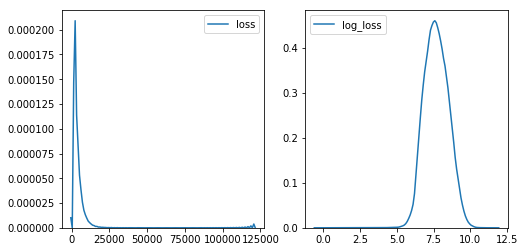

In [21]:
fig,axes=plt.subplots(1,2,figsize=(8,4))
sns.kdeplot(data=data['loss'],ax=axes[0])
sns.kdeplot(data=data['log_loss'],ax=axes[1])
plt.show()

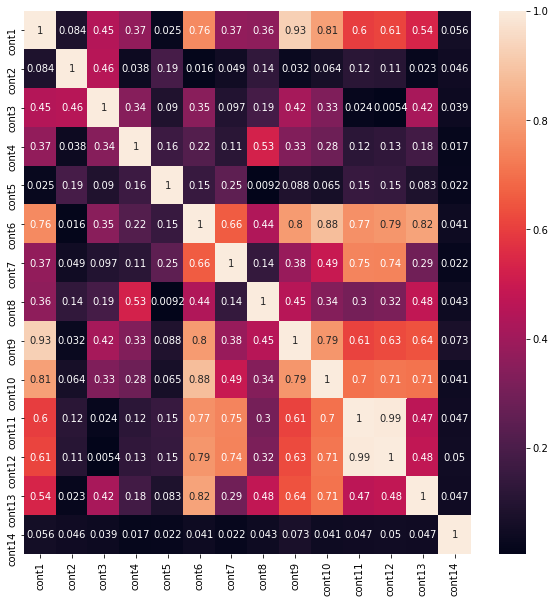

In [17]:
# 查看其它数值特征之间的相关性
numic_list.remove('loss')
data_corr=data[numic_list].corr().abs()

plt.figure(figsize=(10,10))
sns.heatmap(data_corr,annot=True)
plt.show()

In [18]:
corr_list = []
threshold=0.5 # 选出相关性大于设置阈值的特征对
for i in range(0,len(numic_list)): #for 'size' features
    for j in range(i+1,len(numic_list)): #avoid repetition
        if abs(data_corr.iloc[i,j]) >= threshold :
            corr_list.append([data_corr.iloc[i,j],i,j])

# 从大到小排列
sorted_corr_list=sorted(corr_list,key=lambda x:x[0],reverse=True)
for f,i,j in sorted_corr_list:
    print(numic_list[i]+' + '+numic_list[j]+' : ',f)

cont11 + cont12 :  0.9943880243186854
cont1 + cont9 :  0.929877978181633
cont6 + cont10 :  0.8833774121201365
cont6 + cont13 :  0.8151666020427368
cont1 + cont10 :  0.8085829415849946
cont6 + cont9 :  0.7974749137601702
cont9 + cont10 :  0.785716350675036
cont6 + cont12 :  0.7855148291847297
cont6 + cont11 :  0.7741412092026828
cont1 + cont6 :  0.7582992557872632
cont7 + cont11 :  0.7473207911948619
cont7 + cont12 :  0.7429196162370485
cont10 + cont12 :  0.7139928624805786
cont10 + cont13 :  0.7081694521508786
cont10 + cont11 :  0.703106065486111
cont6 + cont7 :  0.6595138472794081
cont9 + cont13 :  0.6420492129092564
cont9 + cont12 :  0.6268909326323777
cont1 + cont12 :  0.61436226079434
cont9 + cont11 :  0.6082391006362816
cont1 + cont11 :  0.5962583123835252
cont1 + cont13 :  0.5350660702033717
cont4 + cont8 :  0.5287935453748247


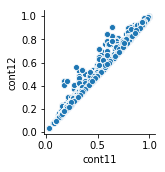

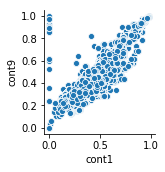

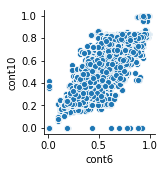

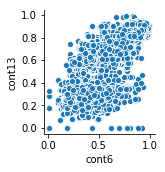

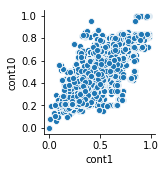

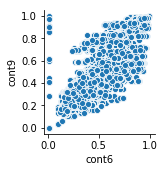

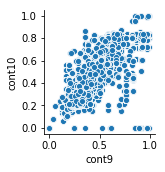

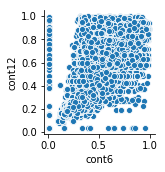

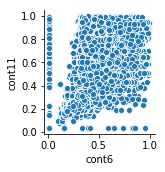

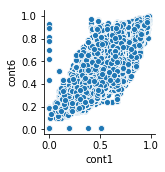

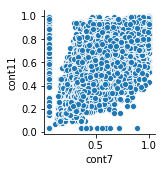

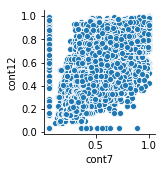

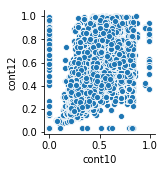

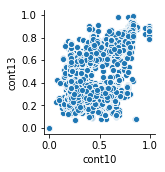

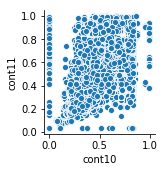

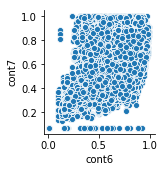

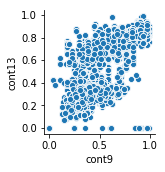

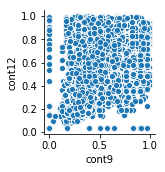

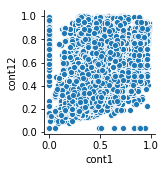

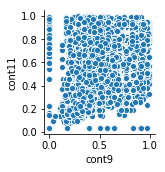

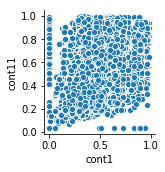

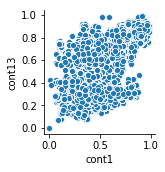

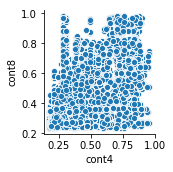

In [19]:
# 可视化上面的特征对
for f,i,j in sorted_corr_list:
    sns.pairplot(data,x_vars=numic_list[i],y_vars=numic_list[j])
    plt.show()
# 可以发现11与12，1与9，6与10几乎是线性关系，分别删除其中一个即可

In [20]:
data.drop(['cont11','cont9','cont6'],axis=1,inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194592 entries, 0 to 194591
Columns: 129 entries, cat1 to log_loss
dtypes: float64(13), int16(2), int8(114)
memory usage: 41.2 MB


### 3.模型

In [22]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,make_scorer
from sklearn.model_selection import KFold,GridSearchCV

In [23]:
features = [x for x in data.columns if x not in ['loss','log_loss']]
x=data[features].values
y=data['log_loss'].values
print(x.shape,y.shape)

(194592, 127) (194592,)


In [24]:
# 自定义评估函数
def mae_eval(pred,dtrain:xgb.DMatrix):
    y=dtrain.get_label()
    return 'mae',mean_absolute_error(np.exp(y),np.exp(pred))
    
dtrain=xgb.DMatrix(x,y)
params={
    'booster':'gbtree',
    'objective':'reg:linear',
    'eta':0.1,
    'max_depth':5,
    'max_child_weight':3,
    'subsample':0.5,
    'colsample_bytree':0.5,
    'silent':True,
    'seed':78,
    'nthread':4
}
cv_results=xgb.cv(params,dtrain,num_boost_round=50,nfold=3,
                  feval=mae_eval,maximize=False,early_stopping_rounds=5)
cv_results

[14:48:09] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\objective\regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:09] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { max_child_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:09] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\objective\regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:09] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { max_chil

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,6.514633,0.001083,6.514656,0.002055,3032.867106,2.370435,3032.867269,4.740180
1,5.871146,0.000756,5.871113,0.002361,3029.780355,2.367819,3029.780192,4.741232
2,5.291840,0.000390,5.291829,0.002532,3024.635091,2.360082,3024.634766,4.745908
3,4.771064,0.000022,4.771084,0.002890,3016.559245,2.345389,3016.559326,4.756413
4,4.302794,0.000221,4.302843,0.002854,3004.534424,2.324805,3004.535563,4.767585
5,3.882669,0.000437,3.882714,0.002665,2987.518229,2.314116,2987.519775,4.759378
6,3.505226,0.000282,3.505270,0.002474,2964.442546,2.292074,2964.443196,4.756445
7,3.166394,0.000136,3.166412,0.002562,2934.373372,2.244879,2934.369385,4.772120
8,2.862405,0.000385,2.862408,0.002830,2896.552653,2.164059,2896.542155,4.821484
9,2.590034,0.000306,2.590165,0.002633,2850.585205,2.152234,2850.591960,4.766475


模型调参

In [28]:
# 使用原生XGBoost自定义符合sklearn接口的类
class XGBoostRegressor(object):
    def __init__(self,**kwargs):
        self.params=kwargs
        if 'num_boost_round' in self.params:
            self.num_boost_round=self.params['num_boost_round']
        self.params.update({'silent': 1, 'seed': 78, 'nthread':4})
        
    def fit(self,xtrain,ytrain):
        dtrain_=xgb.DMatrix(xtrain,ytrain)
        self.xgb_model=xgb.train(self.params,dtrain_,num_boost_round=self.num_boost_round,feval=mae_eval,maximize=False)
    
    def predict(self,xpred):
        dtest_=xgb.DMatrix(xpred)
        return self.xgb_model.predict(dtest_)    
    
    def cv(self,xtrain,ytrain,nfold=3):
        dtrain_=xgb.DMatrix(xtrain,ytrain)
        cv_results=xgb.cv(self.params,dtrain_,num_boost_round=self.num_boost_round,nfold=nfold,
                  feval=mae_eval,maximize=False,early_stopping_rounds=5)
        return cv_results
    
    def get_params(self,deep=True):
        return self.params
    
    def set_params(self,**kwargs):
        self.params.update(**kwargs)
        return self

In [29]:
# 交叉验证
xgb_model=XGBoostRegressor(booster='gbtree',objective='reg:linear',eta=0.1,max_depth=5,
                           max_child_weight=3,subsample=0.5,colsample_bytree=0.5,
                           num_boost_round=50)
xgb_model.cv(x,y,nfold=3)

[11:21:51] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\objective\regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[11:21:52] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { max_child_weight, num_boost_round, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:21:52] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\objective\regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[11:21:52] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Param

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,6.514634,0.001107,6.514638,0.002026,3032.867187,2.370162,3032.867269,4.740180
1,5.871093,0.000833,5.870976,0.002180,3029.780274,2.368275,3029.779460,4.740204
2,5.291746,0.000461,5.291701,0.002359,3024.634196,2.361497,3024.633464,4.743471
3,4.770949,0.000074,4.770916,0.002762,3016.555583,2.346257,3016.554769,4.754129
4,4.302671,0.000245,4.302618,0.002738,3004.528972,2.326290,3004.526855,4.764231
5,3.882539,0.000481,3.882458,0.002577,2987.511475,2.315790,2987.506348,4.756326
6,3.504995,0.000414,3.504949,0.002368,2964.428304,2.300774,2964.421387,4.747812
7,3.166156,0.000205,3.166085,0.002450,2934.355876,2.257858,2934.341309,4.755048
8,2.862173,0.000369,2.862080,0.002688,2896.517741,2.196661,2896.490560,4.779541
9,2.589861,0.000292,2.589895,0.002555,2850.540853,2.173455,2850.520670,4.735586


In [30]:
# 网格搜索最优参数
def mae_(ytrue,ypred):
    return mean_absolute_error(np.exp(ytrue),np.exp(ypred))
scorer=make_scorer(mae_,greater_is_better=False)

xgb_param_grid = {'max_depth': list(range(4,9)), 'min_child_weight': [1,3,6]}
gs=GridSearchCV(xgb_model,xgb_param_grid,scoring=scorer,cv=5)
gs.fit(x,y)

[11:55:45] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\objective\regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:45] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { max_child_weight, num_boost_round, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:55:51] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\objective\regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:52] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\objective\regression_o

GridSearchCV(cv=5,
             estimator=<__main__.XGBoostRegressor object at 0x000001CE004F86D8>,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 3, 6]},
             scoring=make_scorer(mae_, greater_is_better=False))

In [31]:
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 8, 'min_child_weight': 6}
-1187.429679629186


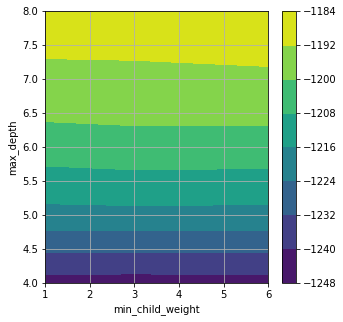

In [35]:
# 可视化两种参数对分数的影响
scores=np.array(gs.cv_results_ ['mean_test_score']  ).reshape(5,3)

plt.figure(figsize=(5,5))
cp=plt.contourf(xgb_param_grid['min_child_weight'], xgb_param_grid['max_depth'], scores)
plt.colorbar(cp)
plt.xlabel('min_child_weight')
plt.ylabel('max_depth')
plt.grid(True)
plt.show()

接下来按照常规顺序进行调参即可。
